In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [15]:
data=pd.read_csv('E:\Covid.csv')

In [16]:
data.head()

,Countries,Infected,Death,Recovered
0,USA,4791,7835,3791
1,India,3444,4636,3384
2,Brazil,2195,6113,2115
3,UK,9561,1428,7825
4,Russia,9109,2565,7812


<AxesSubplot:>

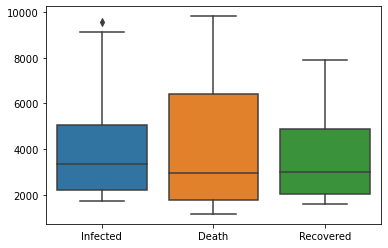

In [17]:
data.isnull().sum()
sns.boxplot(data=data)

In [19]:
grouped_data = data.groupby('Infected')['Death'].agg(['mean', 'std', 'count'])

C:\Users\USER\Anaconda\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\USER\Anaconda\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


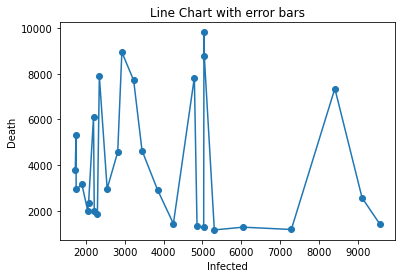

In [22]:
plt.errorbar(grouped_data.index, grouped_data['mean'], yerr=grouped_data['std'], fmt='-o')
plt.xlabel('Infected')
plt.ylabel('Death')
plt.title('Line Chart with error bars')
plt.show()

C:\Users\USER\Anaconda\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\USER\Anaconda\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


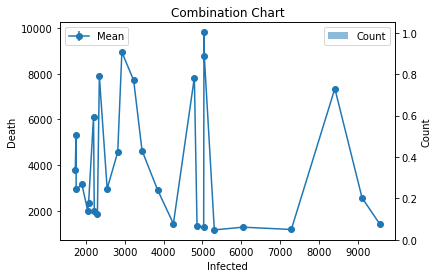

In [24]:
fig, ax1 = plt.subplots()

#Errorbars
#plot line chart with error bars
ax1.errorbar(grouped_data.index, grouped_data['mean'], yerr=grouped_data['std'], fmt='-o', label='Mean')

#set y axis label
ax1.set_ylabel('Death')

#create a second y-axis for the bar chart
ax2 = ax1.twinx()

#plot bar chart with count of numerical data
ax2.bar(grouped_data.index, grouped_data['count'], alpha=0.5, label='Count')

#set y axis label for the bar chart
ax2.set_ylabel('Count')

#Combination Chart
#set x axis label and title
ax1.set_xlabel('Infected')
ax1.set_title('Combination Chart')

#add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [26]:
#Conduct the Z Test or T test
group1_mean = data.loc[data['Infected'] == 'group1', 'Death'].mean()
group1_std = data.loc[data['Infected'] == 'group1', 'Death'].std()
group2_mean = data.loc[data['Infected'] == 'group2', 'Death'].mean()
group2_std = data.loc[data['Infected'] == 'group2', 'Death'].std()

#conduct a t-test if the sample the size is small(<30) or the standard deviation is unknown
t_statistic, p_value = stats.ttest_ind(data.loc[data['Infected'] == 'group1', 'Death'],
                                      data.loc[data['Infected'] == 'group2', 'Death'],
                                      equal_var=False)
print('T-statistic:', t_statistic)

T-statistic: nan
